## Ablation study on the components of the loss funcion

/tmp/ipykernel_705608/4249533559.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(mean_df.columns))


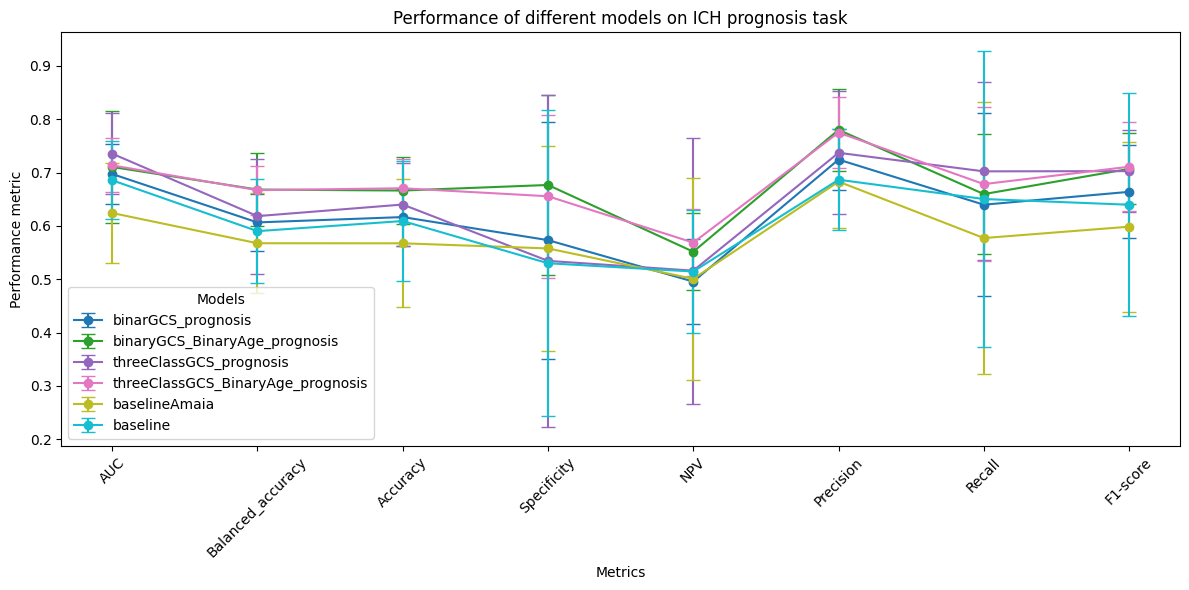

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
metrics=['AUC', 'Balanced_accuracy', 'Accuracy', 'Specificity', 'NPV', 'Precision', 'Recall', 'F1-score']
# read results dataframe for each of the models
binarGCS_prognosis = pd.read_csv('/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/BinaryGCS_Prognosis/fold_metrics_df_BinaryGCS_Prognosis_MulticlassOutput.csv')
binaryGCS_BinaryAge_prognosis = pd.read_csv('/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/BinaryGCS_BinaryAge_Prognosis/fold_metrics_df_BinaryGCSBinaryAge_Prognosis_MulticlassOutput.csv')
threeClassGCS_prognosis = pd.read_csv('/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/ThreeClassGCS_Prognosis/fold_metrics_df_ThreeClassGCS_Prognosis.csv')
threeClassGCS_BinaryAge_prognosis = pd.read_csv('/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/ThreeClassGCS_BinaryAge_Prognosis_SameHP/fold_metrics_df_ThreeClassGCS_BinaryAge_Prognosis_SAMEPARAMETERS_asBinaryGCS_BinaryAge_Prognosis_No_pos_weight.csv')
baselineAmaia = pd.read_csv('/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/BaselineAmaia/fold_metrics_df_RepeatCI_Test_BaselineAmaia_Prognosis301_40.csv')
baseline = pd.read_csv('/home/ubuntu/tenerife/data/ZZ_ICH_PrognosisMICCAI/Results/BaselineDenseNet_Prognosis/Dropout0.2WeightDecay0.0001/fold_metrics_df_RepeatCI_Test_BaselineDenseNet_Prognosis301_40_Dropout0.2WeightDecay0.0001.csv')
# Calculate the mean and std of the metrics for each model
mean_std_data = {}
models = ['binarGCS_prognosis', 'binaryGCS_BinaryAge_prognosis', 'threeClassGCS_prognosis', 'threeClassGCS_BinaryAge_prognosis', 'baselineAmaia', 'baseline']
dataframes = [binarGCS_prognosis, binaryGCS_BinaryAge_prognosis, threeClassGCS_prognosis, threeClassGCS_BinaryAge_prognosis, baselineAmaia, baseline]

for model_name, df in zip(models, dataframes):
    means = df[metrics].mean()
    stds = df[metrics].std()
    mean_std_data[model_name] = (means, stds)

# Create a dataframe to store the calculated statistics
mean_df = pd.DataFrame({model: data[0] for model, data in mean_std_data.items()}, index=metrics)
std_df = pd.DataFrame({model: data[1] for model, data in mean_std_data.items()}, index=metrics)

# Plot the performance of each model in a line plot with error bars
fig, ax = plt.subplots(figsize=(12, 6))

colors = plt.cm.get_cmap('tab10', len(mean_df.columns))

for i, model in enumerate(mean_df.columns):
    ax.errorbar(mean_df.index, mean_df[model], yerr=std_df[model], fmt='o-', label=model, capsize=5, color=colors(i))

ax.set_ylabel('Performance metric')
ax.set_xlabel('Metrics')
ax.set_title('Performance of different models on ICH prognosis task')
plt.xticks(rotation=45)
plt.legend(title='Models', loc='best')
plt.tight_layout()
plt.show()

/tmp/ipykernel_705608/2814423615.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(models))


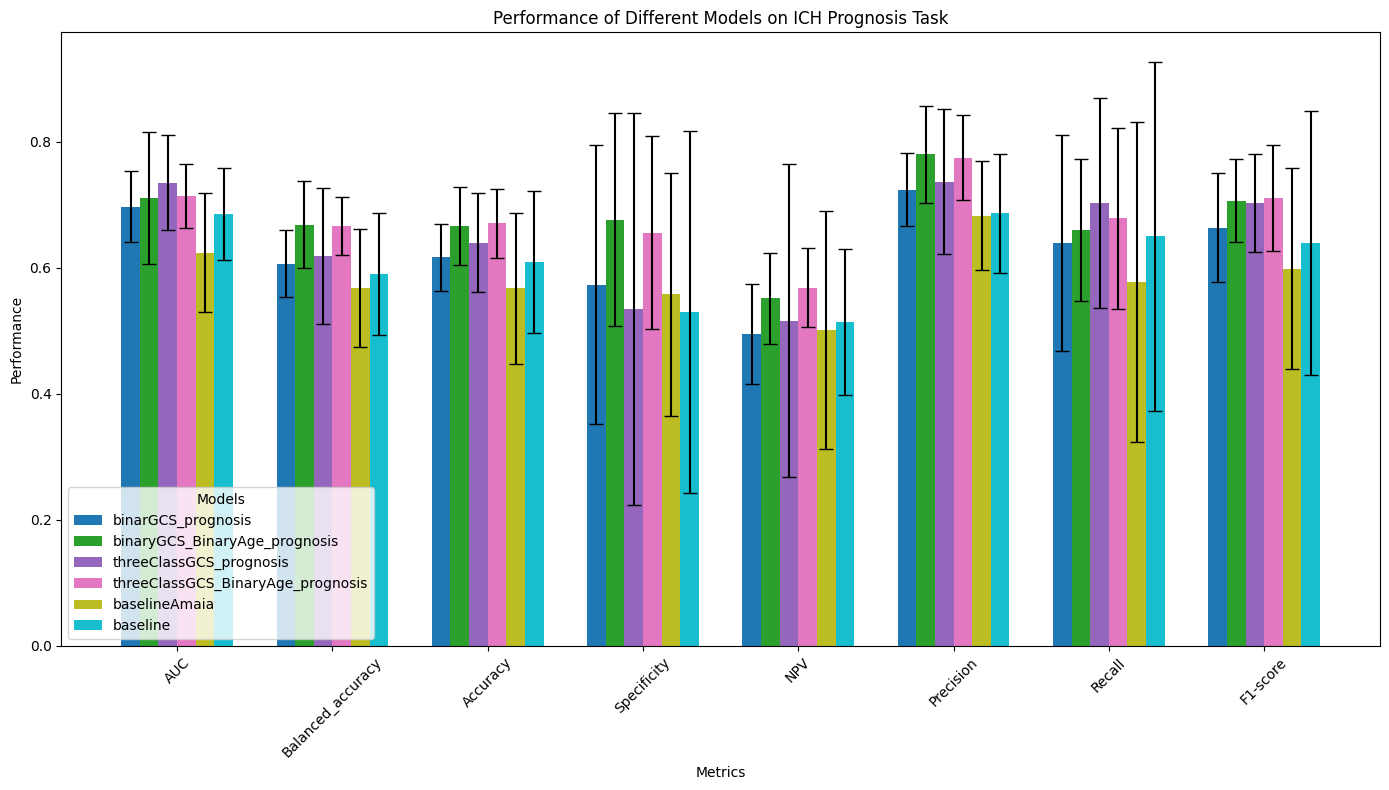

In [22]:
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.12
index = np.arange(len(metrics))

# Set color map
colors = plt.cm.get_cmap('tab10', len(models))

# Plot bars
for i, model in enumerate(mean_df.columns):
    ax.bar(index + i * bar_width, mean_df[model], bar_width, yerr=std_df[model], capsize=5, label=model, color=colors(i))

# Set labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Performance')
ax.set_title('Performance of Different Models on ICH Prognosis Task')
ax.set_xticks(index + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics, rotation=45)
ax.legend(title='Models')

plt.tight_layout()
plt.show()
